<a href="https://colab.research.google.com/github/SichenPa221/Image-processing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

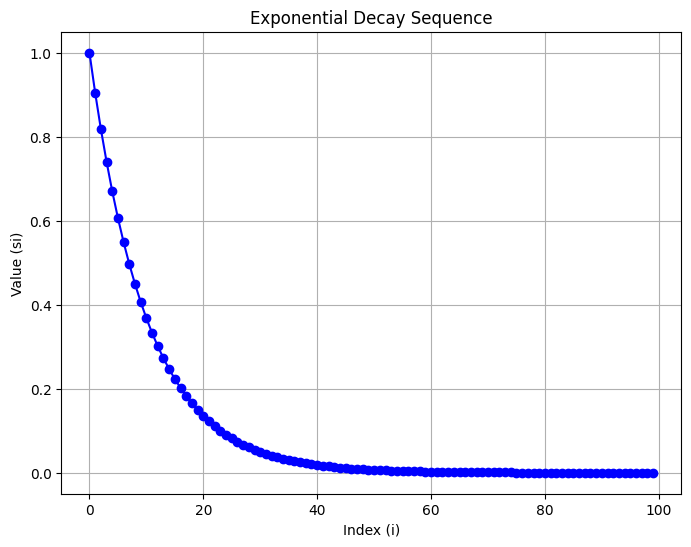

In [ ]:
# define parameter
s0 = 1.0
alpha0 = 0.1
N = 100

# Create an array of indices form 0 to N-1
i_value = np.arange(N)

# computer the sequence

sequence = s0 * np.exp(-alpha0 * i_value)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(i_values, sequence, marker='o', linestyle='-', color='b')
plt.title('Exponential Decay Sequence')
plt.xlabel('Index (i)')
plt.ylabel('Value (si)')
plt.grid(True)
plt.show()

In [6]:
from traitlets.config.configurable import SingletonConfigurable
def generate_noisy_signal(s0, alpha0,sigma,N= 100):
  # Generate N samples of Gaussian noise with mean 0 and standard deviation sigma
  noise = np.random.normal(0,sigma,N)
  # Generate the noisy signal using the given equation

  i = np.arange(N)
  signal = s0*np.exp(-alpha0*i) +noise

  return signal


In [8]:
s0 =10
alpha0 = 0.1
sigma = s0/10

N = 100 # length of the signal
i = np.arange(N)

noisy_signal = generate_noisy_signal(s0,alpha0, sigma, N)

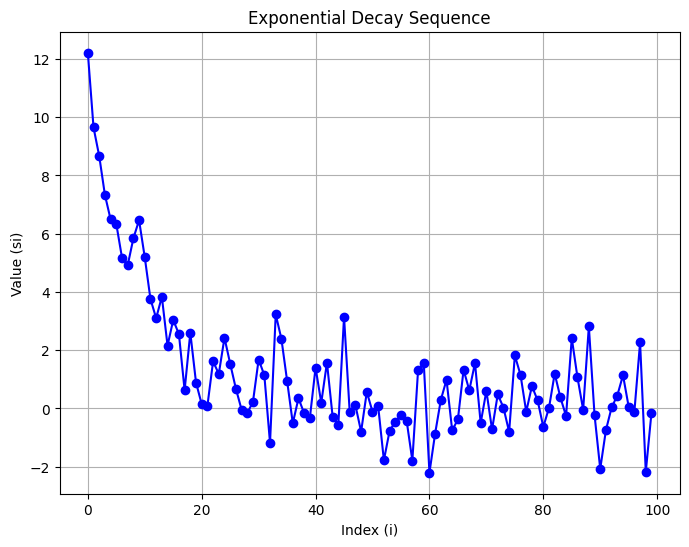

In [10]:
# Create a plot

plt.figure(figsize=(8, 6))
plt.plot(i, noisy_signal, marker='o', linestyle='-', color='b')
plt.title('Exponential Decay Sequence')
plt.xlabel('Index (i)')
plt.ylabel('Value (si)')
plt.grid(True)
plt.show()

In [19]:
def log_likelihood(noisy_signal, alpha, s0, sigma):
    # Calculate the number of data points (N)
    N = len(noisy_signal)

    # Compute the log-likelihood function for the given alpha
    log_lik = -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((noisy_signal - s0 * np.exp(-alpha * np.arange(N)))**2)

    return log_lik

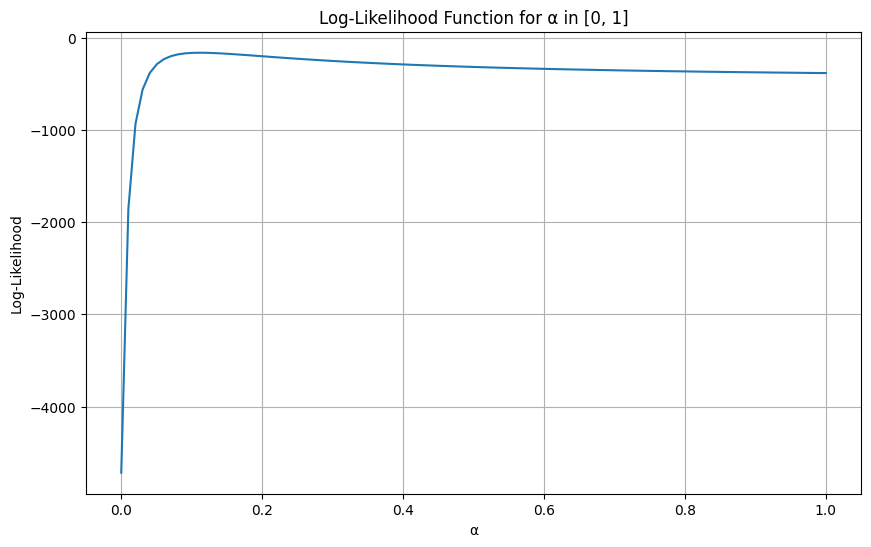

In [20]:
import numpy as np


# Define parameters
s0 = 10
sigma = 1

# Generate a noisy signal realization
alpha_values = np.linspace(0, 1, 100)  # Create a range of alpha values from 0 to 1
realization = generate_noisy_signal(s0, alpha_values, sigma)  # Generate noisy signal realizations for all alpha values

# Calculate log-likelihood for each alpha
log_likelihood_values = [log_likelihood(realization,alpha,  s0, sigma) for alpha in alpha_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, log_likelihood_values)
plt.title("Log-Likelihood Function for α in [0, 1]")
plt.xlabel("α")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()



In [22]:
import numpy as np
from scipy.optimize import minimize

def find_mle(realization, s0, sigma, alpha_initial_guess=0.1):
    # Define the negative log-likelihood function for optimization
    def negative_log_likelihood(alpha):
        N = len(realization)
        return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)

    # Perform optimization to find the MLE of alpha
    result = minimize(negative_log_likelihood, alpha_initial_guess, method='BFGS')

    # The MLE estimate of alpha is in result.x
    mle_alpha = result.x[0]

    return mle_alpha

# Example usage:
s0 = 10
sigma = 1
alpha_initial_guess = 0.1
realization = generate_noisy_signal(s0, alpha_initial_guess, sigma)

mle_estimate = find_mle(realization, s0, sigma, alpha_initial_guess)
print(f"Maximum Likelihood Estimator (MLE) for α: {mle_estimate}")


Maximum Likelihood Estimator (MLE) for α: 0.1


<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in square
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in exp
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in square
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in exp
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in square
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-22-7ac96bac58b2>:8: RuntimeWarning: overflow encountered in exp
  return -(N / 2) * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((realization - s0 * np.exp(-alpha * np.arange(N)))**2)
<ipython-input-22-7ac96bac58b2>:8: 

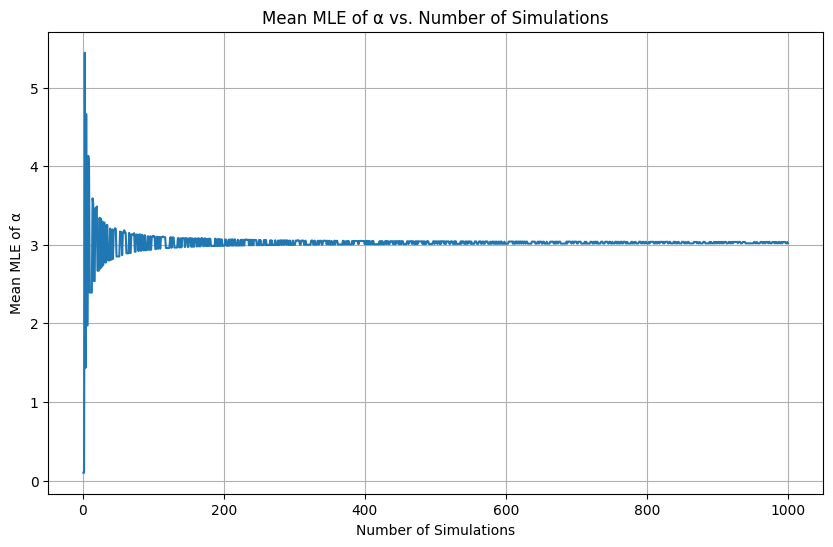

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_samples, s0, sigma, alpha_initial_guess=0.1):
    mean_estimates = []

    for i in range(1, num_samples + 1):
        # Generate a noisy signal realization
        realization = generate_noisy_signal(s0, alpha_initial_guess, sigma)

        # Estimate the MLE of alpha for the current realization
        mle_estimate = find_mle(realization, s0, sigma, alpha_initial_guess)

        # Update the mean estimate for the current number of simulations
        mean_estimate = np.mean(mean_estimates + [mle_estimate])
        mean_estimates.append(mean_estimate)

    return mean_estimates

# Example usage:
num_samples = 1000  # Number of Monte Carlo samples
s0 = 10
sigma = 1
alpha_initial_guess = 0.1

mean_estimates = monte_carlo_simulation(num_samples, s0, sigma, alpha_initial_guess)

# Create a plot of the mean estimator variation
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_samples + 1), mean_estimates)
plt.title("Mean MLE of α vs. Number of Simulations")
plt.xlabel("Number of Simulations")
plt.ylabel("Mean MLE of α")
plt.grid(True)
plt.show()

